<a href="https://colab.research.google.com/github/MyoungJae111/easyocr/blob/main/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: 필수 패키지 설치 (Colab 환경에서 한 번만 실행)
!pip install easyocr            # EasyOCR 라이브러리 설치 (OCR 수행용)
!pip install opencv-python-headless  # OpenCV 설치 (이미지 처리용, GUI 필요 없어서 headless 버전)
!pip install matplotlib         # matplotlib 설치 (이미지 시각화용)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import easyocr
import cv2
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# 📌 Step 3: Colab 파일 업로드 UI 띄우기
uploaded = files.upload()  # 사용자가 파일 업로드를 하면 딕셔너리 형태로 저장됨

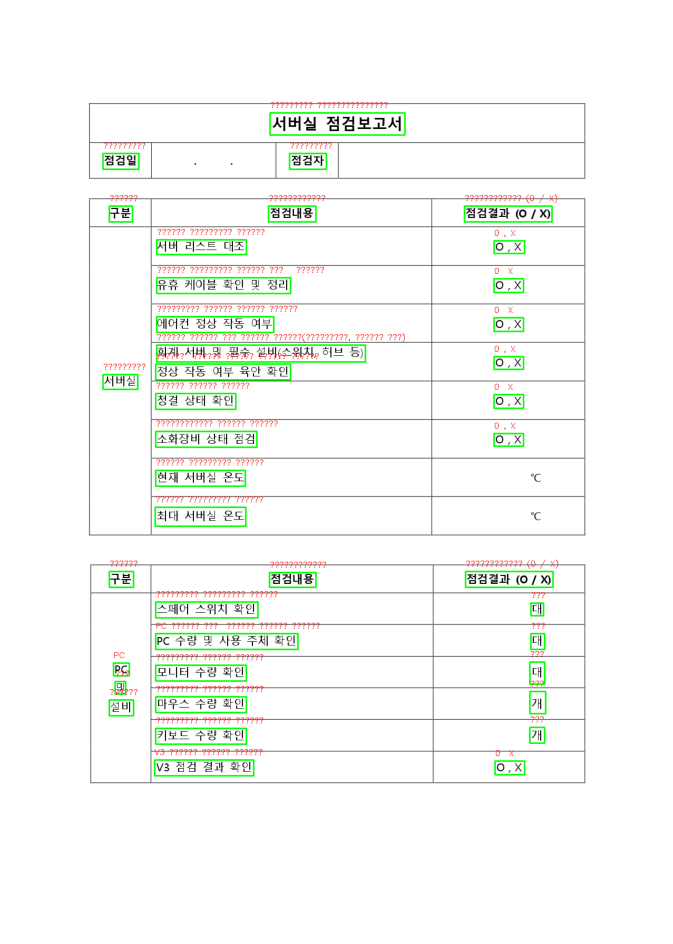

[
  {
    "text": "서버실 점검보고서",
    "x": 493,
    "y": 195,
    "width": 256,
    "height": 42,
    "confidence": 0.76
  },
  {
    "text": "점검일",
    "x": 176,
    "y": 272,
    "width": 68,
    "height": 30,
    "confidence": 1.0
  },
  {
    "text": "점검자",
    "x": 530,
    "y": 272,
    "width": 70,
    "height": 30,
    "confidence": 1.0
  },
  {
    "text": "구분",
    "x": 188,
    "y": 372,
    "width": 44,
    "height": 30,
    "confidence": 1.0
  },
  {
    "text": "점검내용",
    "x": 490,
    "y": 372,
    "width": 90,
    "height": 30,
    "confidence": 1.0
  },
  {
    "text": "점검결과 (0 / X)",
    "x": 862,
    "y": 372,
    "width": 166,
    "height": 30,
    "confidence": 0.55
  },
  {
    "text": "서버 리스트 대조",
    "x": 278,
    "y": 436,
    "width": 170,
    "height": 28,
    "confidence": 0.7
  },
  {
    "text": "0 , X",
    "x": 918,
    "y": 438,
    "width": 58,
    "height": 24,
    "confidence": 0.51
  },
  {
    "text": "유휴 테이블 확인 및   정리",
    "x": 278,
    "y": 508,
 

In [ ]:
# 📌 Step 4: 업로드된 파일 이름 가져오기 (첫 번째 파일 기준)
for fn in uploaded.keys():
    image_path = fn
    break  # 첫 번째 파일만 처리

# 📌 Step 5: 업로드한 이미지를 PIL로 열고 RGB 형식으로 변환
image = Image.open(image_path).convert("RGB")

# 📌 Step 6: PIL 이미지를 NumPy 배열로 변환 (OpenCV 처리 편의를 위해)
image_np = np.array(image)

# 📌 Step 7: EasyOCR 리더 생성 (한국어 + 영어 인식, GPU는 비활성화)
reader = easyocr.Reader(['ko', 'en'], gpu=False)

# 📌 Step 8: 이미지에서 텍스트 추출 (bbox, 텍스트, 신뢰도 반환)
results = reader.readtext(image_np)

# 📌 Step 9: 추출된 텍스트 정보를 저장할 리스트 생성
text_objects = []

# 📌 Step 10: 결과 반복 처리 — 각 텍스트 블록에 대해 좌표와 텍스트 추출 및 시각화
for (bbox, text, conf) in results:
    # bbox는 네 꼭짓점 좌표: top-left, top-right, bottom-right, bottom-left
    (tl, tr, br, bl) = bbox

    # 좌측 상단 x, y 좌표 계산
    x = int(tl[0])
    y = int(tl[1])

    # 텍스트 박스 가로, 세로 길이 계산
    w = int(tr[0] - tl[0])
    h = int(bl[1] - tl[1])

    # 텍스트 객체 정보를 딕셔너리로 저장
    text_objects.append({
        "text": text,                 # 인식된 텍스트
        "x": x,                      # 박스 왼쪽 상단 x 좌표
        "y": y,                      # 박스 왼쪽 상단 y 좌표
        "width": w,                  # 박스 가로 길이
        "height": h,                 # 박스 세로 길이
        "confidence": round(conf, 2) # 신뢰도 (소수점 2자리로 반올림)
    })

    # OpenCV로 사각형 박스 그리기 (초록색, 두께 2)
    cv2.rectangle(image_np, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 텍스트를 박스 위쪽에 붉은색 글씨로 표시 (폰트 크기 0.5, 두께 1)
    cv2.putText(image_np, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 0, 255), 1)

# 📌 Step 11: matplotlib로 이미지 출력 (OpenCV는 BGR이기 때문에 RGB로 변환 필요)
plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 표시 제거
plt.show()

# 📌 Step 12: 추출된 텍스트 객체 리스트 JSON 형태로 출력 (한글 깨짐 방지 위해 ensure_ascii=False)
import json
print(json.dumps(text_objects, indent=2, ensure_ascii=False))

In [ ]:
for fn in uploaded.keys():
    image_path = fn
    break

# 2. 원본 이미지 로드
image = cv2.imread(image_path)
h, w, _ = image.shape

# 3. EasyOCR로 텍스트와 바운딩 박스 읽기 (한글+영어)
reader = easyocr.Reader(['ko', 'en'], gpu=False)
results = reader.readtext(image)

# 4. 빈 배경(흰색) 이미지 생성 (원본과 같은 크기)
blank = np.ones_like(image) * 255

# 5. PIL 이미지로 변환 (OpenCV는 BGR, PIL은 RGB)
blank_pil = Image.fromarray(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(blank_pil)

# 6. 한글 폰트 경로 지정 (NanumGothic.ttf 업로드 필요)
try:
    font_path = "/content/drive/MyDrive/malgun.ttf"  # Colab에 업로드한 폰트 파일 경로
    # 임시 기본 크기 설정 (실제 크기는 bbox 높이에 따라 조절)
    base_font_size = 30
except:
    font_path = None

# 7. bbox 높이로 폰트 크기 추정 + 텍스트 그리기
for bbox, text, conf in results:
    # bbox 좌표에서 최소 최대값으로 사각형 크기 계산
    top_left = np.min(bbox, axis=0).astype(int)
    bottom_right = np.max(bbox, axis=0).astype(int)
    bbox_height = bottom_right[1] - top_left[1]

    # bbox 높이로 폰트 크기 결정 (조정 가능)
    # 글자 높이보다 약간 작게 설정 (0.8 배)
    font_size = max(int(bbox_height * 0.8), 10)  # 최소 10pt 이상

    # 폰트 로드
    if font_path:
        font = ImageFont.truetype(font_path, font_size)
    else:
        font = ImageFont.load_default()

    # PIL은 좌상단 기준 좌표에 바로 텍스트 출력 가능
    draw.text((top_left[0], top_left[1]), text, font=font, fill=(0, 0, 0))

# 8. PIL 이미지를 다시 OpenCV 형식으로 변환
output_img = cv2.cvtColor(np.array(blank_pil), cv2.COLOR_RGB2BGR)

# 9. 원본 이미지와 비교 출력
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Blank Background with OCR Text")
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
from google.colab import files

# --- 1. 이미지 업로드 및 로드 ---
uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    break

image = cv2.imread(image_path)
orig = image.copy()

# --- 2. EasyOCR로 텍스트 바운딩박스 추출 ---
reader = easyocr.Reader(['ko', 'en'], gpu=False)
results = reader.readtext(image)

# --- 3. 텍스트 영역 흰색으로 지우기 (텍스트 제거) ---
for bbox, text, conf in results:
    pts = np.array(bbox).astype(int)
    cv2.fillPoly(image, [pts], (255,255,255))  # 흰색으로 텍스트 박스 덮기

# --- 4. 도형 검출을 위한 전처리 ---
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색 배경을 반전하여 검출 쉽게

# --- 5. 컨투어(윤곽선) 검출 ---
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# --- 6. 도형 바운딩 박스 그리기 ---
output = orig.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 100:  # 너무 작은 잡음 제외
        continue

    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x,y), (x+w, y+h), (0,255,0), 2)

# --- 7. 결과 출력 ---
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Text Removed")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Shapes with Bounding Box")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


Saving turbine-1.jpg to turbine-1.jpg


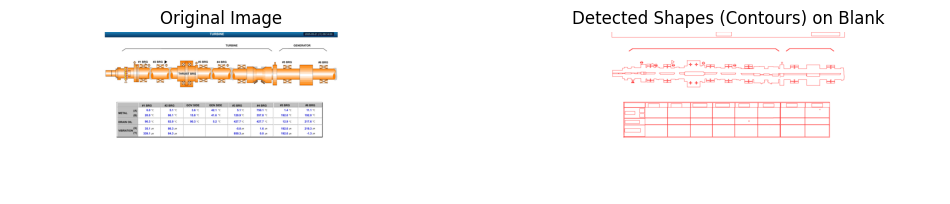

In [ ]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
from google.colab import files

# 1. 이미지 업로드 및 로드
uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    break

orig = cv2.imread(image_path)
image = orig.copy()

# 2. EasyOCR로 텍스트 영역 검출
reader = easyocr.Reader(['ko','en'], gpu=False)
results = reader.readtext(image)

# 3. 텍스트 영역 흰색으로 덮어 텍스트 제거
for bbox, text, conf in results:
    pts = np.array(bbox).astype(int)
    cv2.fillPoly(image, [pts], (255,255,255))

# 4. 그레이스케일 변환 및 이진화 (도형 검출 준비)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# 5. 컨투어(윤곽선) 검출
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 6. 빈 흰 배경 이미지 생성 (원본 크기, 3채널)
blank = np.ones_like(orig) * 255

# 7. 도형 컨투어(윤곽선) 그리기
cv2.drawContours(blank, contours, -1, (0,0,255), 2)  # 빨간색, 두께 2

# 결과 출력
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Detected Shapes (Contours) on Blank")
plt.axis('off')
plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))
plt.show()
